In [1]:
import numpy as np
import qiskit as q
from qiskit import QuantumCircuit
from qiskit import Aer #simulator framework for qiskit
from matplotlib import style
style.use("classic")
%matplotlib inline

In [2]:
nqubits = 4

In [3]:
circuit = QuantumCircuit(nqubits, nqubits)

for qbit in range(nqubits-1):
    circuit.h(qbit)
circuit.x(nqubits-1)
circuit.h(nqubits-1)

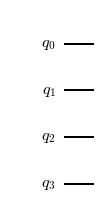

In [4]:
import math

# Oracle circuit
oracle = QuantumCircuit(nqubits, name='oracle$_\omega$')

'''
# Balanced oracle
b = np.random.randint(1,2**nqubits-1)
b_str = format(b, '0'+str(nqubits-1)+'b')
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oracle.x(qubit)

for qubit in range(nqubits-1):
    oracle.cx(qubit, nqubits-1)
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oracle.x(qubit)
'''


# Constant oracle
if np.random.randint(2) == 1:
    oracle.x(nqubits-1)
    
oracle.to_gate()

oracle.draw('mpl')

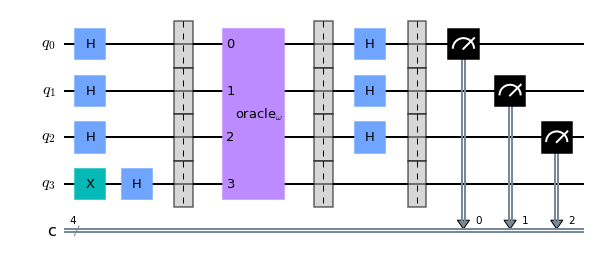

In [5]:
circuit.barrier()
circuit.append(oracle, range(nqubits))
circuit.barrier()
for qbit in range(nqubits-1):
    circuit.h(qbit)
circuit.barrier()

circuit.measure(range(nqubits-1), range(nqubits-1))
    
circuit.draw('mpl')

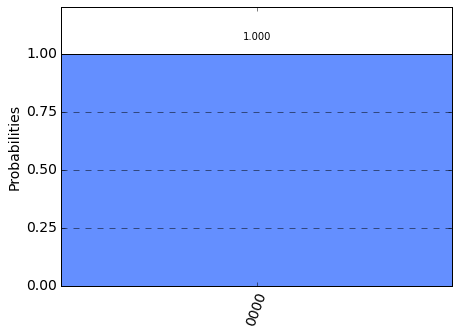

In [6]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend("aer_simulator")

job = q.execute(circuit , backend=backend, shots=500)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])